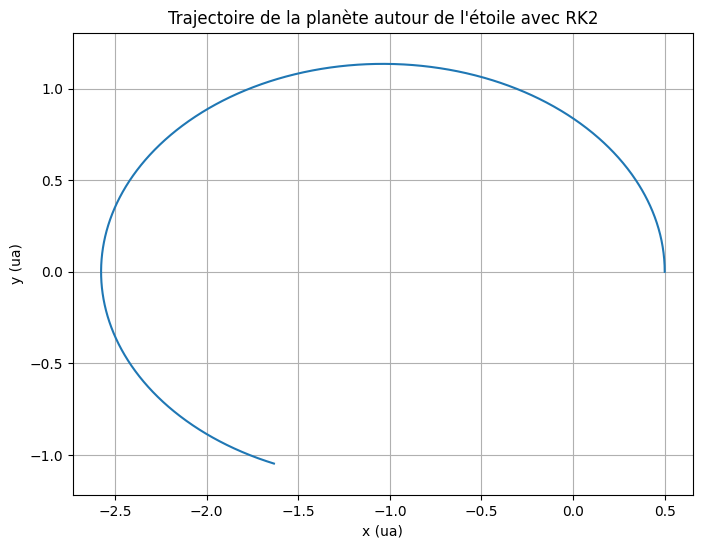

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes de la simulation
G = 4 * np.pi**2  # Constante gravitationnelle dans les unités astronomiques
dt = 0.001        # Pas de temps
T = 2             # Période d'une année
N = int(T / dt)   # Nombre d'itérations pour couvrir une période
# Tableaux pour stocker les positions et vitesses
x = np.zeros(N)
y = np.zeros(N)
vx = np.zeros(N)
vy = np.zeros(N)

# Conditions initiales
x[0] = 0.5 # position x initiale au périhélie
y[0] = 0   # position y initiale
vx[0] = 0  # vitesse initiale en x
vy[0] = 11.5 # vitesse initiale en y pour une orbite elliptique
# Fonctions pour les dérivées de vitesse et de position
def ax(x, y):
    return -G * x / (x**2 + y**2)**1.5

def ay(x, y):
    return -G * y / (x**2 + y**2)**1.5

# Intégration numérique avec la méthode de Runge-Kutta d'ordre 2
for n in range(N-1):
    # Première étape de RK2
    k1x = vx[n]
    k1y = vy[n]
    k1vx = ax(x[n], y[n])
    k1vy = ay(x[n], y[n])

    # Calcul des valeurs à mi-chemin
    x_mid = x[n] + 0.5 * dt * k1x
    y_mid = y[n] + 0.5 * dt * k1y
    vx_mid = vx[n] + 0.5 * dt * k1vx
    vy_mid = vy[n] + 0.5 * dt * k1vy

    # Deuxième étape de RK2
    k2x = vx_mid
    k2y = vy_mid
    k2vx = ax(x_mid, y_mid)
    k2vy = ay(x_mid, y_mid)

    # Mise à jour des valeurs pour le prochain pas de temps
    x[n+1] = x[n] + dt * k2x
    y[n+1] = y[n] + dt * k2y
    vx[n+1] = vx[n] + dt * k2vx
    vy[n+1] = vy[n] + dt * k2vy

# Affichage de la trajectoire
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('Trajectoire de la planète autour de l\'étoile avec RK2')
plt.xlabel('x (ua)')
plt.ylabel('y (ua)')
plt.axis('equal')
plt.grid(True)
plt.show()
